In [18]:
from goesaws import *
import datetime
from datetime import datetime
import pandas as pd
import sys

bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-MCMIPM'
lightning_mapper = 'GLM-L2-LCFA'
yr = 2022
day = 12
month = 7
hr = 21
date = datetime(yr,month,day,hr)
day_of_year = date.timetuple().tm_yday
minutes = 2
start = 0

In [19]:
# Lightning Data

names = ["flash_lat","flash_lon","flash_time_offset"]

glmprefix = gen_prefix(product = "GLM-L2-LCFA", year = yr, day = day_of_year, hour = hr)
glmfiles = gen_fn(bucket = bucket_name, prefix=glmprefix)
#There should be 180 GLM files per hour (one every 20 seconds)
glmdatasets = [gen_data(key=glmfiles[i], bucket = bucket_name) for i in range(start,start+minutes*3)]

In [20]:
# ABI Data

abiprefix = gen_prefix(product=product_name,year = yr, day=day_of_year, hour = hr)
abifiles = gen_fn(bucket=bucket_name,prefix=abiprefix)
abidatasets = [gen_data(key=abifiles[i], bucket = bucket_name) for i in range(start,start+minutes)]


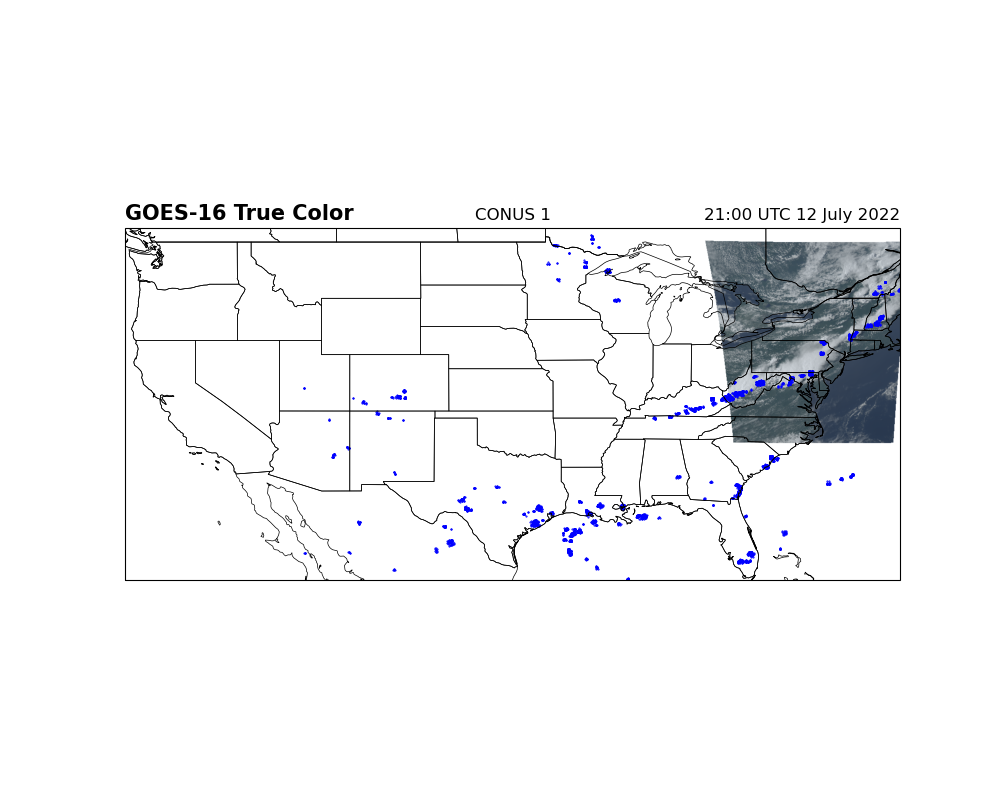

In [21]:
# Merge ABI and Lightning Data

nfile = xr.merge([glmdatasets[1],abidatasets[1]])
plot_abiglm(nfile)